In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [1]:
!pip install -q gdown

# Descargar el archivo ZIP con el ID correcto
!gdown --id 1LlctXtCQTkavTYTuyRlrRQRKoTelRZ1u -O archive.zip
!unzip -q archive.zip -d letras_data
!ls letras_data


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LlctXtCQTkavTYTuyRlrRQRKoTelRZ1u
From (redirected): https://drive.google.com/uc?id=1LlctXtCQTkavTYTuyRlrRQRKoTelRZ1u&confirm=t&uuid=04de604c-e827-4ba4-b188-08b8bd39173c
To: /content/archive.zip
100% 276M/276M [00:03<00:00, 71.6MB/s]
dataset  Set-Original  zip_contents.txt


In [2]:
!ls letras_data/Set-Original/


Dataset


In [3]:
import os
import cv2
import numpy as np

X = []
y = []

base_dir = 'letras_data/Set-Original/Dataset'

for letra in sorted(os.listdir(base_dir)):
    ruta_letra = os.path.join(base_dir, letra)
    if not os.path.isdir(ruta_letra):
        continue

    for tipo in ['may', 'min']:
        ruta_tipo = os.path.join(ruta_letra, tipo)
        if not os.path.isdir(ruta_tipo):
            continue

        for archivo in os.listdir(ruta_tipo):
            if archivo.endswith('.png'):
                img_path = os.path.join(ruta_tipo, archivo)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (28, 28))
                img = img / 255.0

                etiqueta = letra.upper() if tipo == 'may' else letra.lower()

                X.append(img)
                y.append(etiqueta)

X = np.array(X)
y = np.array(y)

np.save('X_letras.npy', X)
np.save('y_letras.npy', y)

print("Guardado exitoso:", X.shape, y.shape)


Guardado exitoso: (60535, 28, 28) (60535,)


Shape de X: (60535, 28, 28)
Shape de y: (60535,)
Etiquetas únicas: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'N_' 'O' 'P' 'Q'
 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'n_' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


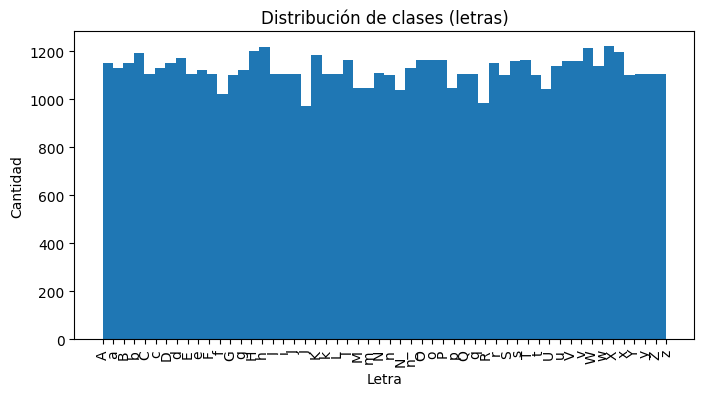

In [77]:

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Etiquetas únicas:", np.unique(y))

# Histograma de distribución de clases
plt.figure(figsize=(8,4))
plt.hist(y, bins=len(np.unique(y)))
plt.title("Distribución de clases (letras)")
plt.xlabel("Letra")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()


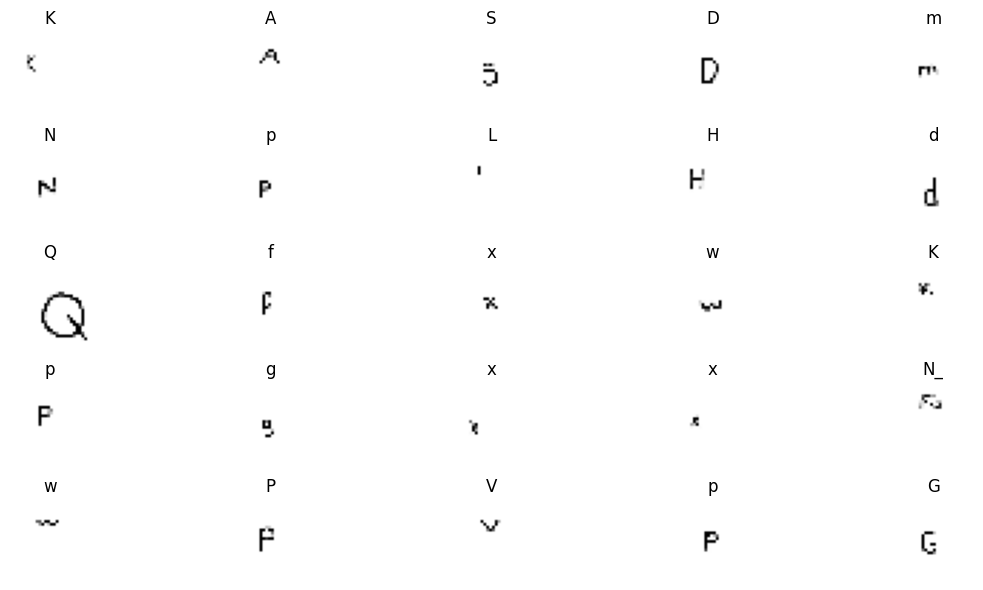

In [49]:
plt.figure(figsize=(12,6))
for i in range(25):
    idx = np.random.randint(0, X.shape[0])
    plt.subplot(5,5,i+1)
    plt.title(y[idx])
    plt.imshow(X[idx], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

X = np.load('X_letras.npy')
y = np.load('y_letras.npy')

print(X.shape)  # (N, 28, 28)
print(y.shape)  # (N,)
print(np.unique(y))  # Verifica letras disponibles


(60535, 28, 28)
(60535,)
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'N_' 'O' 'P' 'Q'
 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'n_' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [5]:

# Convertir letras a números únicos (ej. 'A'→0, 'b'→1, ...)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Puedes revertir con: le.inverse_transform([0, 1, 2, ...])


In [6]:


# Separar 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Expandir dimensión para canal (grises)
if X_train.ndim == 3:
    X_train = X_train[..., None]
    X_test = X_test[..., None]


In [70]:


num_clases = len(np.unique(y_encoded))  # Total de letras

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_clases, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 54)             │         6,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,222 (965.71 KB)

 Trainable params: 247,222 (965.71 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
log = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20
)


Epoch 1/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1222 - loss: 3.4292 - val_accuracy: 0.5484 - val_loss: 1.5232
Epoch 2/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5860 - loss: 1.3709 - val_accuracy: 0.6664 - val_loss: 1.0824
Epoch 3/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6839 - loss: 1.0220 - val_accuracy: 0.7024 - val_loss: 0.9398
Epoch 4/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7327 - loss: 0.8417 - val_accuracy: 0.7466 - val_loss: 0.8097
Epoch 5/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7614 - loss: 0.7460 - val_accuracy: 0.7678 - val_loss: 0.7425
Epoch 6/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7828 - loss: 0.6763 - val_accuracy: 0.7737 - val_loss: 0.7059
Epoch 7/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7990 - loss: 0.6162 - val_accuracy: 0.7811 - val_loss: 0.6887
Epoch 8/20
1514/1514 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8162 - loss: 0.5707

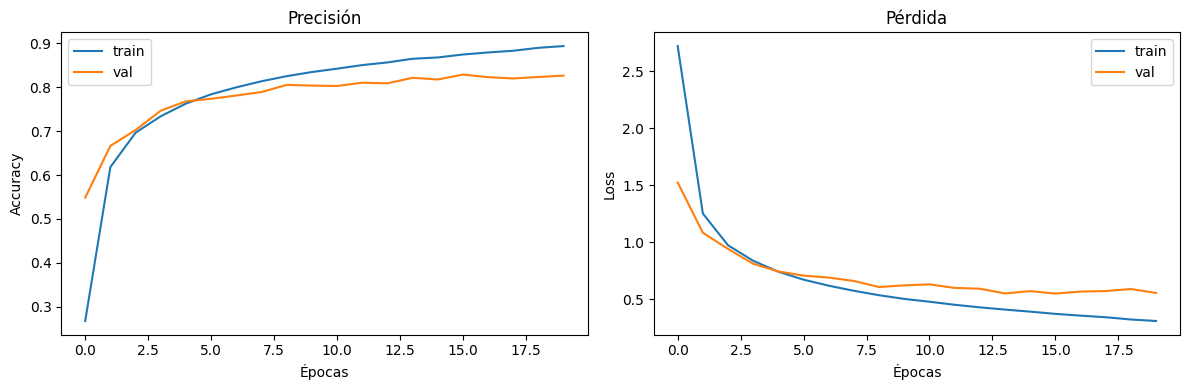

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'], label='train')
plt.plot(log.history['val_accuracy'], label='val')
plt.title('Precisión')
plt.xlabel('Épocas'); plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='val')
plt.title('Pérdida')
plt.xlabel('Épocas'); plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


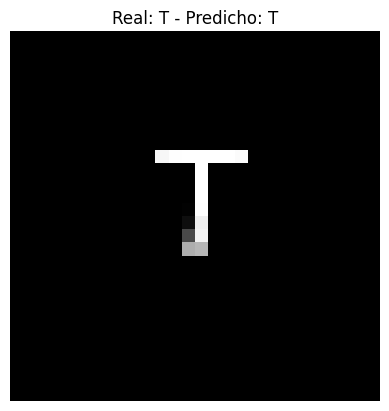

In [83]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]

# Predecir
salida = model.predict(im[None, :, :, :])[0]
pred_index = np.argmax(salida)
pred_letra = le.inverse_transform([pred_index])[0]
real_letra = le.inverse_transform([label])[0]

# Mostrar
plt.title(f"Real: {real_letra} - Predicho: {pred_letra}")
plt.imshow(-im[:, :, 0], cmap='gray')
plt.axis('off')
plt.show()


In [86]:
# guardar modelo
model.save('../models/modelo_letras.h5')
print("Modelo guardado como ../models/modelo_letras.h5")


Modelo guardado como ../models/modelo_letras.h5


In [87]:
# Cargar el modelo
from tensorflow.keras.models import load_model

model_cargado = load_model('../models/modelo_letras.h5')
print("Modelo cargado correctamente")
model_cargado.summary()


Modelo cargado correctamente


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 54)             │         6,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,224 (965.72 KB)

 Trainable params: 247,222 (965.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)